<a href="https://colab.research.google.com/github/kyungmin0101/medical_ai/blob/main/240219/week2_1_kyungmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
#approach all of the data
import glob
import csv
import pandas as pd
path = "/content/drive/MyDrive/lecture/medical_ai/2ndSeries_21.05.21/*/{}*".format('W')
df_list = []
ri_list = []

for file in glob.glob(path, recursive = True) :
  df = pd.read_csv(file, skiprows=24)

  df_list.append(df)
  if float(file.split('/')[-2]) < 1.3 :
    ri_list.append('Normal Tissue')

  elif float(file.split('/')[-2]) >= 1.3 and float(file.split('/')[-2]) <= 1.32 :
    ri_list.append('CIN-1')

  elif float(file.split('/')[-2]) >= 1.33 and float(file.split('/')[-2]) <= 1.37 :
    ri_list.append('CIN-2')

  elif float(file.split('/')[-2]) >= 1.38 and float(file.split('/')[-2]) <= 1.39 :
    ri_list.append('CIN-3')

  elif float(file.split('/')[-2]) >= 1.39 :
    ri_list.append('Cervical Cancer')

<Axes: xlabel='1475.0000'>

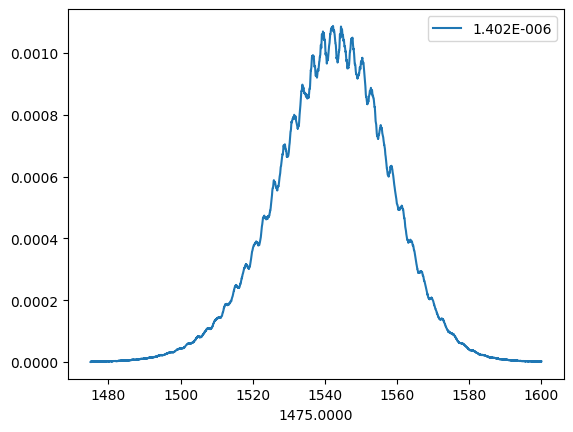

In [17]:
#visualize a single data
df_list[0].astype(float).plot(x=0, y=1)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
import numpy as np
import time

x_train, x_test, y_train, y_test = train_test_split(df_list, ri_list, test_size=0.1)

nsamples, nx, ny = np.array(x_train).shape
d2_x_train = np.array(x_train).reshape((nsamples,nx*ny))

nsamples, nx, ny = np.array(x_test).shape
d2_x_test = np.array(x_test).reshape((nsamples,nx*ny))


In [38]:
dec_model = DecisionTreeClassifier(random_state = 0)
rand_model = RandomForestClassifier(max_depth=2, random_state=0)
adb_model = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
light_gbm_model = LGBMClassifier(learning_rate=0.1, n_estimators=100)
knn_model = KNeighborsClassifier(n_neighbors = 3)

In [39]:
start_knn = time.time()
knn_model.fit(d2_x_train, y_train)
end_knn = time.time()

In [20]:
start_dec = time.time()
dec_model.fit(d2_x_train, y_train)
end_dec = time.time()

In [25]:
start_rand = time.time()
rand_model.fit(d2_x_train, y_train)
end_rand = time.time()

In [26]:
start_adb = time.time()
adb_model.fit(d2_x_train, y_train)
end_adb = time.time()

In [28]:
start_gbm = time.time()
light_gbm_model.fit(d2_x_train, y_train)
end_gbm = time.time()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.205185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 432698
[LightGBM] [Info] Number of data points in the train set: 207, number of used features: 6300
[LightGBM] [Info] Start training from score -1.931521
[LightGBM] [Info] Start training from score -1.381475
[LightGBM] [Info] Start training from score -2.388280
[LightGBM] [Info] Start training from score -0.669280
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [23]:
start_eval_dec = time.time()
dec_pred = dec_model.predict(d2_x_test)
end_eval_dec = time.time()

print('Training Time : {}'.format(end_dec - start_dec))
print('Accuracy of decision tree : {}'.format(accuracy_score(dec_pred, y_test)))
print('Testing Time : {}'.format(end_eval_dec - start_eval_dec))

Training Time : 1.3159985542297363
Accuracy of decision tree : 0.9166666666666666
Testing Time : 0.002489805221557617


In [31]:
start_eval_rand = time.time()
rand_pred = rand_model.predict(d2_x_test)
end_eval_rand = time.time()

print('Training Time : {}'.format(end_rand - start_rand))
print('Accuracy of Random Forest : {}'.format(accuracy_score(rand_pred, y_test)))
print('Testing Time : {}'.format(end_eval_rand - start_eval_rand))

Training Time : 0.33145570755004883
Accuracy of Random Forest : 0.7916666666666666
Testing Time : 0.011315345764160156


In [34]:
start_eval_adb = time.time()
adb_pred = adb_model.predict(d2_x_test)
end_eval_adb = time.time()

print('Training Time : {}'.format(end_adb - start_adb))
print('Accuracy of Adaboost : {}'.format(accuracy_score(adb_pred, y_test)))
print('Testing Time : {}'.format(end_eval_adb - start_eval_adb))

Training Time : 16.191274404525757
Accuracy of Adaboost : 1.0
Testing Time : 0.07742738723754883


In [37]:
start_eval_gbm = time.time()
gbm_pred = light_gbm_model.predict(d2_x_test)
end_eval_gbm = time.time()

print('Training Time : {}'.format(end_gbm - start_gbm))
print('Accuracy of LightGBM : {}'.format(accuracy_score(gbm_pred, y_test)))
print('Testing Time : {}'.format(end_eval_gbm - start_eval_gbm))

Training Time : 28.89738130569458
Accuracy of LightGBM : 0.9166666666666666
Testing Time : 0.01192784309387207


In [41]:
start_eval_knn = time.time()
knn_pred = knn_model.predict(d2_x_test)
end_eval_knn = time.time()

print('Training Time : {}'.format(end_knn - start_knn))
print('Accuracy of KNN : {}'.format(accuracy_score(knn_pred, y_test)))
print('Testing Time : {}'.format(end_eval_knn - start_eval_knn))

Training Time : 0.006731510162353516
Accuracy of KNN : 0.9583333333333334
Testing Time : 0.037572383880615234
